# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [189]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from webdriver_manager.chrome import ChromeDriverManager

In [190]:
#browser = Browser('chrome')

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [191]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [192]:
# Create a Beautiful Soup Object
my_html = browser.html
soup = BeautifulSoup(my_html, 'html.parser')

In [193]:
# Extract all rows of data

header_rows = soup.find('tr')
table_rows = soup.find_all('tr', class_='data-row')
table_rows[0],header_rows

(<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [194]:
# Create an empty list
data_list = []
header_list = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    td_tags = row.find_all("td")
    td_list = []
    for td in td_tags:
        td_list.append(td.text)
    data_list.append(td_list)
data_list

header_tags = header_rows.find_all("th")

for row in header_tags:
    header_list.append(row.text)
header_list



['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [195]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_list, columns=header_list)

In [196]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [197]:
# Change data types for data analysis
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df["sol"] = mars_df["sol"].astype("int64")
mars_df["ls"] = mars_df["ls"].astype("int64")
mars_df["month"] = mars_df["month"].astype("int64")
mars_df["min_temp"] = mars_df["min_temp"].astype("float64")
mars_df["pressure"] = mars_df["pressure"].astype("float64")

In [198]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [199]:
mars_months = np.array([mars_df["month"]])
print(mars_months)

mars_months.size

np.max(mars_months)

mars_months.max(axis=1)


[[6 6 6 ... 5 5 5]]


array([12])

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [200]:
# 1. How many months are there on Mars?
mars_df["month"].value_counts().sort_index()


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [201]:
num_months = mars_df["month"].nunique()
print(f" There are {num_months} months on Mars")

 There are 12 months on Mars


In [202]:
# 2. How many Martian days' worth of data are there?
num_days = mars_df["sol"].nunique()
print(f"There are {num_days} martian days on data")


There are 1867 martian days on data


In [203]:
# 3. What is the average low temperature by month?

avr_temp_month = mars_df.groupby(["month"])["min_temp"].mean() #Object
avr_temp_month = avr_temp_month.to_frame()
avr_temp_month = avr_temp_month.reset_index()
avr_temp_month.info #Dataframe
avr_temp_month


,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


<function matplotlib.pyplot.show(close=None, block=None)>

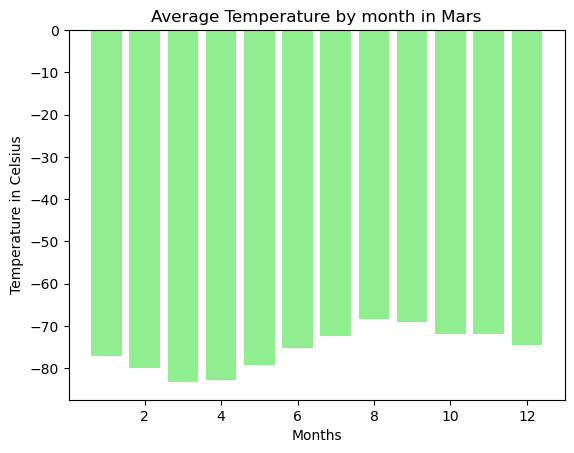

In [204]:
# Plot the average temperature by month

plt.bar(avr_temp_month["month"], avr_temp_month["min_temp"], color="lightgreen")
plt.title("Average Temperature by month in Mars")
plt.xlabel("Months")
plt.ylabel("Temperature in Celsius")
plt.savefig("plots/avr_temperature.png")
plt.show

In [205]:
reorder_df = avr_temp_month.sort_values(by=["min_temp"])
reorder_df

,month,min_temp
2,3,-83.307292
3,4,-82.747423
1,2,-79.932584
4,5,-79.308725
0,1,-77.160920
5,6,-75.299320
11,12,-74.451807
6,7,-72.281690
10,11,-71.985507
9,10,-71.982143


<function matplotlib.pyplot.show(close=None, block=None)>

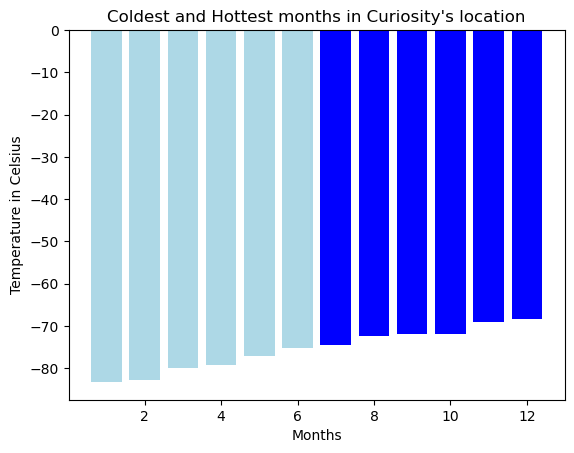

In [206]:
# Identify the coldest and hottest months in Curiosity's location

colors = ["lightblue", "lightblue", "lightblue", "lightblue", "lightblue", "lightblue", "blue", "blue", "blue", "blue", "blue", "blue"]

plt.bar(avr_temp_month["month"], reorder_df["min_temp"], color=colors)
plt.title("Coldest and Hottest months in Curiosity's location")
plt.xlabel("Months")
plt.ylabel("Temperature in Celsius")
plt.savefig("plots/curiositys_temp.png")
plt.show

In [207]:
print("The coldest month in Mars is 3rd and hottest is 8th")

The coldest month in Mars is 3rd and hottest is 8th


In [208]:
# 4. Average pressure by Martian month

avr_press_mars = mars_df.groupby(["month"])["pressure"].mean() #Object
avr_press_mars = avr_press_mars.to_frame()
avr_press_mars = avr_press_mars.reset_index()
avr_press_mars.info #Dataframe
avr_press_mars


,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


<function matplotlib.pyplot.show(close=None, block=None)>

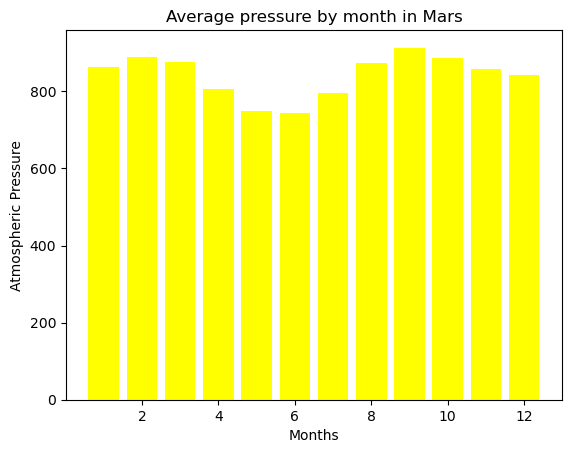

In [209]:
# Plot the average pressure by month

plt.bar(avr_press_mars["month"], avr_press_mars["pressure"], color="yellow")
plt.title("Average pressure by month in Mars")
plt.xlabel("Months")
plt.ylabel("Atmospheric Pressure")
plt.savefig("plots/avr_pressure.png")
plt.show

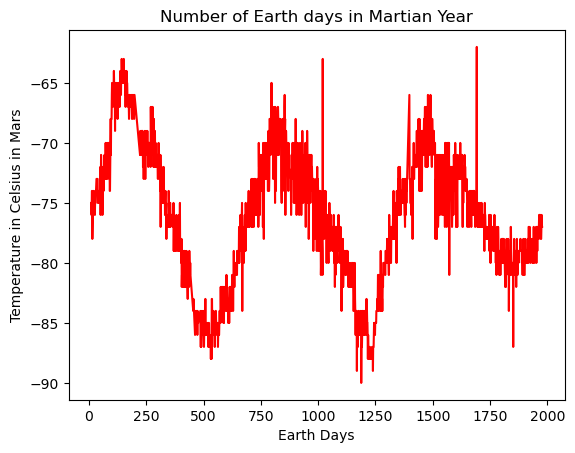

In [210]:
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.plot(mars_df["sol"], mars_df["min_temp"], color="red")
plt.title("Number of Earth days in Martian Year")
plt.xlabel("Earth Days")
plt.ylabel("Temperature in Celsius in Mars")
plt.savefig("plots/avr_pressure.png")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [211]:
# Write the data to a CSV
#mars_df_complete = mars_df.insert(7,"Avr Temp", avr_temp_month["min_temp"], True)

mars_df.to_csv('mars_weather.csv',  encoding='utf8', index=False)